 逻辑回归  linear_model.LogisticRegression
使用损失函数这个评估指标，来衡量参数为thiata的模型拟合训练集时产生的信息损失大小，并以此衡量参数thiata的优劣。
故：我们追求能够让损失函数最小化的参数组合
注意：没有“求解参数”需求的模型没有损失函数，比如KNN,决策树

正则化：是用来防止模型过拟合的过程，常用的有L1和L2，被称为正则项。
L1和L2都可以控制过拟合，但他们的效果并不相同，当正则化强度逐渐增大（即C逐渐变小），参数thianta的取值会逐渐变小，
但L1正则化会将参数压缩为0，L2正则化只会让参数尽量小，不会取到0.

在L1正则化在逐渐加强的过程中，携带信息量小的，对模型贡献不大的特征的参数，会比携带信息量大的对模型有巨大贡献的
参数更快变为0，所以L1正则化本质是一个特征选择过程，掌管了参数的稀疏性。L1正则化越强，参数向量中就越多的参数为0
，参数就越稀疏，选出来的特征就越少，以此来防止过拟合。因此，如果特征量很大，数据维度很高，我们会倾向于使用L1正则化。由于L1正则化的这个性质，逻辑回归的特征选择可以由Enbedded嵌入法来完成。

相对的，L2正则化在加强的过程中，会尽量让每一个特征对模型都有一些小的贡献，但携带信息少，对模型贡献不大的特征的参数
会非常接近0，通常来说，如果我们的主要目的是为了防止过拟合，选择L2正则化可以，如果选择L2后还是过拟合，模型在未知数
上的效果表现很差，就可以考虑L1正则化，两种正则化下C的取值都可以通过学习曲线来进行调整。

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = load_breast_cancer()

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(569, 30)

In [7]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [8]:
# 逻辑回归的重要属性coef_,查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)

In [9]:
lrl1.coef_

array([[ 3.99135925,  0.0315213 , -0.13587572, -0.01620892,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50430867,  0.        , -0.07126662,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24544304, -0.1283886 , -0.01442236,  0.        ,
         0.        , -2.05139702,  0.        ,  0.        ,  0.        ]])

In [10]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [11]:
lrl2 = lrl2.fit(X,y)

In [12]:
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

In [13]:
lrl2.coef_ != 0

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

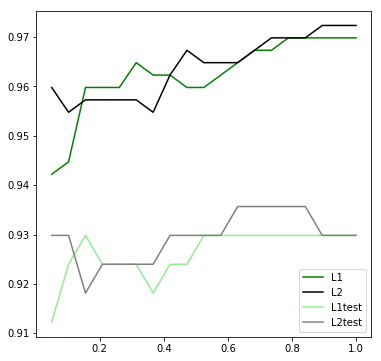

In [14]:
# C学习曲线
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) # 图例的位置在哪里？4表示，右下角  服从坐标系
plt.show()

逻辑回归特征工程：
    1、业务选择
    2、PCA和SVD一般不使用（会将特征的可解释性磨灭掉）
    3、统计方法可以使用，但不是非常必要

In [1]:
# import this

In [15]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [16]:
data = load_breast_cancer()

In [17]:
data.data.shape

(569, 30)

In [18]:
LR_ = LR(solver="liblinear",C=0.8,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508998790078644

In [19]:
# 用L1范数进行特征选择，这里就不用threshold了
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target) 

In [20]:
X_embedded.shape

(569, 9)

In [21]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368323826808401

In [22]:
abs(LR_.fit(data.data,data.target).coef_).max()

1.9407192479360273

(0.0, 30)
(0.1021431183124225, 17)
(0.204286236624845, 12)
(0.3064293549372675, 10)
(0.40857247324969, 8)
(0.5107155915621124, 8)
(0.612858709874535, 5)
(0.7150018281869575, 5)
(0.81714494649938, 5)
(0.9192880648118025, 5)
(1.0214311831242249, 5)
(1.1235743014366475, 4)
(1.22571741974907, 3)
(1.3278605380614925, 2)
(1.430003656373915, 2)
(1.5321467746863375, 1)
(1.63428989299876, 1)
(1.7364330113111823, 1)
(1.838576129623605, 1)
(1.9407192479360273, 1)


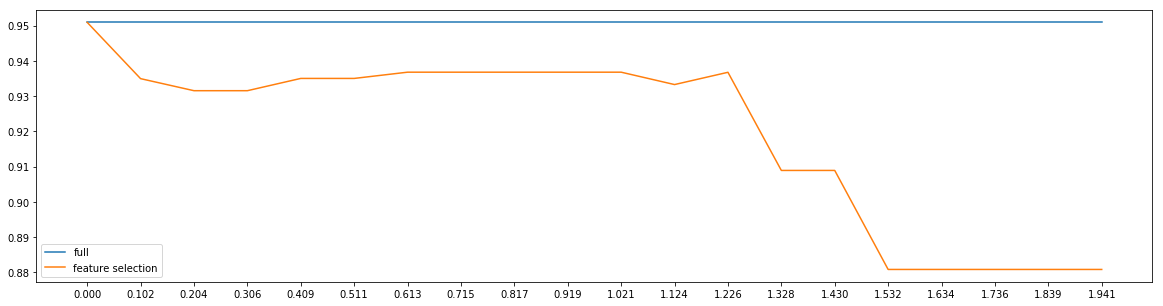

In [23]:
# threshold 学习曲线
fullx = []
fsx = []
 # 此时，我们使用的判别指标，就不是L1范数了，而是逻辑回归中的系数了
threshold = np.linspace(0,abs(LR_.fit(data.data,data.target).coef_).max(),20)

k = 0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k+=1
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

由此看出，这种方法基本无效，接下来用第二种调整方法，调节逻辑回归类LR_，通过画C的学习曲线来实现

0.9563164376458386 7.01


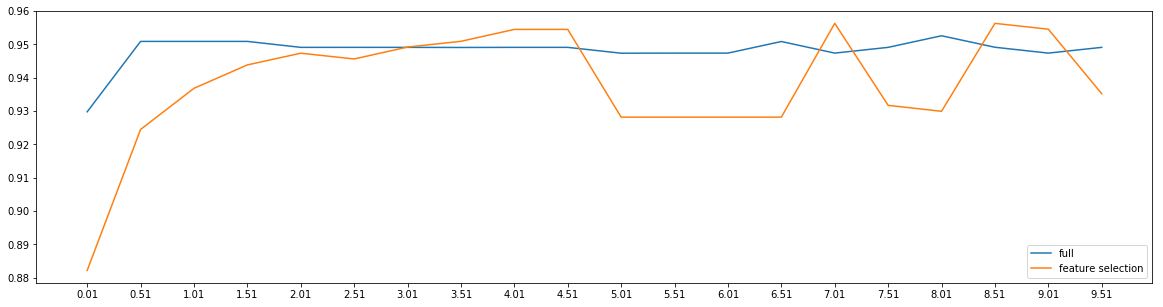

In [24]:
# C的学习曲线
fullx = []
fsx = []

C = np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9580405755768732 6.069999999999999


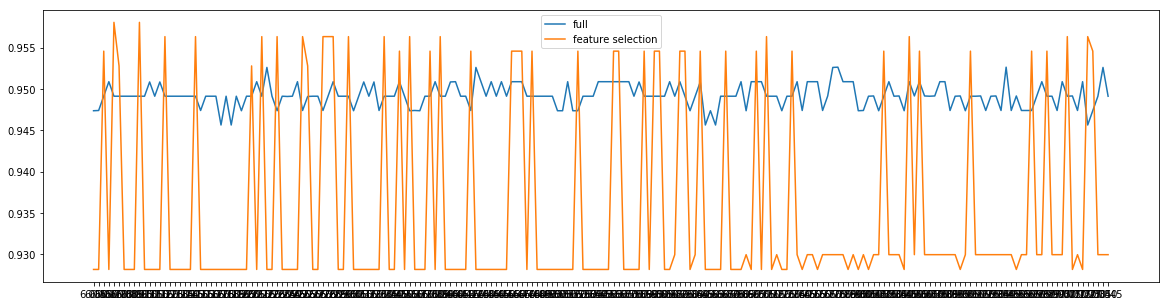

In [25]:
fullx = []
fsx = []

C = np.arange(6.05,7.05,0.005)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [26]:
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9491152450090743

In [27]:
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.928182525278714

In [28]:
X_embedded.shape

(569, 10)

梯度下降法

求解梯度，是在损失函数上对损失函数自身的自变量求偏导，而这两个自变量，刚好是逻辑回归的预测函数的参数

梯度的方向时损失函数的值增加最快的方向，即小球每次滚动的方向的反方向

步长绝对不是一个物理距离，它甚至不是梯度下降过程中任何距离的直接变化，它是梯度向量的大小d上的一个比例，影响着
参数向量thianta每次迭代后改变的部分

参数迭代是靠梯度向量的大小dstar步长alpha来实现的，而损失函数J的降低又是靠thiata调节来实现的，所以步长可以调节损失函数下降的速率。

max_iter 越大，代表步长越小，模型迭代的时间越长，反之，则代表步长设置的很大，模型迭代时间很短

迭代结束，获取到J的最小值后，我们就可以找出这个最小值对应的参数向量thiata，逻辑回归的预测函数也就可以根据这个参数thiata
来建立了。

In [29]:
from sklearn.model_selection import train_test_split
l2 = []
l2test = []
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


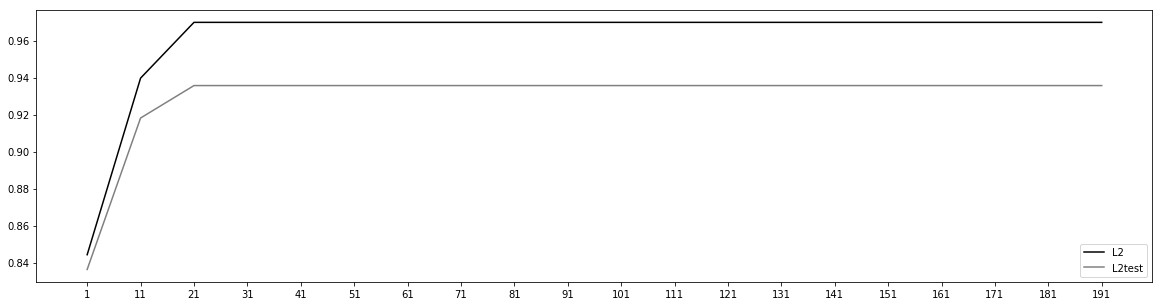

In [30]:
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.8,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]

plt.figure(figsize=[20,5])
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [31]:
# 使用属性.n_iter_ 来调用本次求解中的真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.8,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([24], dtype=int32)

多远逻辑回归

multi_class:
    ovr 分类问题是二分类
    multinomial  分类问题是多分类，在输入参数是solver 是 liblinear 时不可使用
    auto 会根据数据的分类情况和其他参数模型来确定要处理的分类问题的类型，如果是二分类，或者solver的取值是
     liblinear ,auto 会自动选择ovr , 反之，则会选择nultinomial。

solver :
    liblinear 坐标下降法--L1,L2--二分类、ovr、不支持多分类MvM
    \sag  随机梯度下降法
    \saga 更一般的随机平均梯度下降法(使用标准化的数据集很有用）

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
for multi_class in ('multinomial','ovr'):
    lr = LR(solver='sag',max_iter=100,random_state=42
                            ,multi_class=multi_class).fit(iris.data,iris.target)
    print("training score : %.3f(%s)"%(lr.score(iris.data,iris.target),multi_class))

training score : 0.987(multinomial)
training score : 0.960(ovr)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [35]:
# 打印两种multi_class模式下的训练分数
# %的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串
# 字符串后的%后使用元组来容纳变量，字符串中有几个%，元组中就需要几个变量

案例：用逻辑回归制作评分卡

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv(r"D:\titanic\rankingcard.csv",index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
data.shape

(150000, 11)

In [ ]:
data.info()

#去除重复值

In [ ]:
data.drop_duplicates(inplace=True)  # 删除重复值，替换原数据

In [ ]:
data.info()

In [ ]:
# 删除后千万不要忘记，恢复索引
data.index = range(data.shape[0])

In [ ]:
data.info()

填补缺失值

In [ ]:
# 探索缺失值
data.isnull().sum()/data.shape[0]  # 空值的比例，可进行
# data.isnull().mean()  同理

In [ ]:
data["NumberOfDependents"].fillna(data["NumberOfDependents"].mean(),inplace=True) 
# 填补缺失值

In [ ]:
# 随机森林填补缺失值
# 写一个能够填补任何列的函数，一次只能填补一列
def fill_missing_rf(X,y,to_fill):
    """
    参数：
        X：要填补的特征矩阵
        y：完整的，没有缺失值的标签
        to_fill:字符串，要填补的那一列的名称
    """
    # 构建新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]  # 新标签
    df = pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)  # 新特征
    
    # 找出训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Xtest.index,:]
    
    # 用随机森林来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [ ]:
X.shape

In [ ]:
y_pred = fill_missing_rf(X,y,"MonthlyIncome")  # 实例化

In [ ]:
# 确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [ ]:
data.info()

日常处理异常值，用箱线图或3牛法则来找到异常值（千万不要说用眼睛看）

In [ ]:
# 描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99])

In [ ]:
# 异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们查一下有多人


(data["age"] == 0).sum()

In [ ]:
# 将次异常值删掉
data = data[data["age"] != 0]

In [ ]:
# 描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99])

In [ ]:
# 还存在三个不太正常的值
data[data.loc[:,"NumberOfTimes90DaysLate"]>90].count()

In [ ]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()  # 显示逾期的天数和对应的人数

In [ ]:
# 删除上述异常值
data = data[data.loc[:,"NumberOfTimes90DaysLate"]<90]  # 将这一列中小于90的布尔值取出

In [ ]:
# 恢复索引
data.index = range(data.shape[0])

In [ ]:
data.info()

由于业务要求，不使用量纲统一处理。

样本不均衡问题

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [ ]:
y.value_counts()
# 0   139292
# 1    9873

In [ ]:
n_sample = X.shape[0]

n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print('样本个数:{};1占{:.2%};0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

# 样本个数：149265；1占6.62%；0占93.38%

逻辑回归用得是上采样，不断地抽样，增加样本数量偏少的那一方

In [1]:
# 如果报错，就在prompt安装：pip install imblearn
import imblearn
# imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高于sklearn很多
# imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from imblearn.over_sampling import SMOTE  # 上采样.

sm = SMOTE(random_state=42) # 实例化
X,y = sm.fit_sample(X,y) # 返回已经上采样完毕之后的特征矩阵和标签

In [ ]:
n_sample_ = X.shape[0]

In [ ]:
X.shape
# 变成了270000个数据

In [ ]:
pd.Series(y).value_counts()
# 1   139292
# 0   139292

In [2]:
# n_1_sample = pd.Series(y).value_counts()[1]
# n_0_sample = pd.Series(y).value_counts()[0]

# print("样本个数：{}；1占{:.2%};0占{:.2%}".format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

# # 样本个数：149105；1占93.38%；0占93.38%

分训练集和测试集

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

In [ ]:
model_data = pd.concat([Y_train,X_train],axis=1)

In [ ]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [ ]:
vali_data = pd.concat([Y_vali,X_vali],axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [ ]:
# 处理完成之后，将数据保存成自己的目录
model_data.to_csv(r"")
vali_data.to_csv(r"")

分箱：连续变量离散化。IV是标准。达到的效果是组内尽可能相似，组间尽可能相异。用卡方检验的P值评定，P值很大，说明非常相似则可以合并。

In [ ]:
DataFrame["列名"] # 当这个列存在的时候，就是索引
# 当这个列不存在的时候，DataFrame会生成叫做这个列名的一个新的列

In [ ]:
# 按照等频对需要分箱的列进行分箱

# “age”为例子

model_data["qcut"],updown = pd.qcut(model_data["age"],retbins=True,q=20)
"""
pd.qcut,基于分位数的分箱函数，本质是将连续型变量离散化，只能够处理一维数据。
返回箱子的上界和下界。
参数q：要分箱的个数。
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限。

"""

In [ ]:
model_data["qcut"].value_counts()   # 分的箱子的上下界以及区间内的个数。

In [ ]:
# 在这里时让model_data增加新的一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data["qcut"]

In [ ]:
# 所有箱子的上限和下限
updown # 返回一个列表，总共有21个数，划分成了20个箱子

In [ ]:
# 统计每个分箱0,1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [6]:
# zip 能将列表变成一对一对元组这样一个功能
[*zip([1,2,3],["a","b","c","d"])]
# zip 是一个惰性对象，加上[]和*才输出，否则无法看到里面是什么
# zip 会按照最短的那个进行结合

[(1, 'a'), (2, 'b'), (3, 'c')]

In [ ]:
[*zip(updown,updown[1:])]  # 结合生成了20个箱子。

In [ ]:
[*zip(updown,updown[1:]，coount_y0,coount_y1)] # [(上限，下限，0的个数，1的个数)]

In [ ]:
# num_bins 值分别为每个区间的上界、下界、0出现的次数、1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]

In [ ]:
columns = ["min","max","count_0","count_1"]
df = pd.DataFrame(num_bins,columns=columns)

In [ ]:
df["total"] = df.count_0 + df.count_1  # 一个箱子中所有的样本数

df["percentage"] = df.total / df.total.sum() # 一个箱子中的样本数占所有样本数的比例

df["bad_rate"] = df.count_1 / df.total

df["good%"] = df.count_0 / df.count_0.sum()

df["bad%"] = df.count_1 / df.count_0.sum()

df["woe"] = np.log(df["good%"] / df["bad%"])

In [ ]:
rate = df["good%"] - df["bad%"]
iv_age = np.sum(rate*df.woe)
# 0.331

In [ ]:
# 定义woe 函数 和IV 函数
def get_woe(num_bins):
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1  # 一个箱子中所有的样本数
    df["percentage"] = df.total / df.total.sum() # 一个箱子中的样本数占所有样本数的比例
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0 / df.count_0.sum()
    df["bad%"] = df.count_1 / df.count_0.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv_age = np.sum(rate*df.woe)
    reutrn iv

卡方检验、合并箱体、画出IV曲线

In [ ]:
# 检验相邻两个框的置信度，P值，如果P值很大就说明两个相似，合并即可
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt
import scipy

IV = []
axisx = []
while len(num_bins_) > 2:
    psv = []
    # 获取 num_bins_ 两两之间的卡方检验置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
        
    # 通过 p 值进行处理，合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                        num_bins_[i][0],
                        num_bins_[i+1][1]
                        num_bins_[i][2]+num_bins_[i+1][2]
                        num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.ticks(axisx)
plt.show()

In [ ]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        psv = []
    
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
        
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                        num_bins_[i][0],
                        num_bins_[i+1][1]
                        num_bins_[i][2]+num_bins_[i+1][2]
                        num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
afterbins = get_bin(num_bins,4)

In [ ]:
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    """自动最优分箱函数
    
    参数：
    DF：需要输入的数据
    X: 需要分箱的列名
    Y：分箱数据对应的标签 Y 的列名
    n: 保留分箱个数
    q：初始分箱的个数
    graph：是否要画出IV图像
    
    区间为前开后闭（]
    """
    DF = DF[[X,Y]].copy()
    
    DF["qcut"],bins = pd.qcut(DF[X],retbins=True,q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    
    for i in range(q):
        if 0 in num_bins[i][2:]:
            num_bins[0:2] = [(num_bins_[i][0],
                            num_bins_[i+1][1]
                            num_bins_[i][2]+num_bins_[i+1][2]
                            num_bins_[i][3]+num_bins_[i+1][3])]
            continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2]
                num_bins[i-1][3]+num_bins[i][3])]
            break
    else:
        break
        
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1  # 一个箱子中所有的样本数
        df["percentage"] = df.total / df.total.sum() # 一个箱子中的样本数占所有样本数的比例
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0 / df.count_0.sum()
        df["bad%"] = df.count_1 / df.count_0.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv_age = np.sum(rate*df.woe)
        reutrn iv
    IV = []
    axisx = []
    while len(num_bins_) > 2:
        psv = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                            num_bins_[i][0],
                            num_bins_[i+1][1]
                            num_bins_[i][2]+num_bins_[i+1][2]
                            num_bins_[i][3]+num_bins_[i+1][3])]
        bins_df = get_woe(num_bins_)
        axisx.append(len(num_bins_))
        IV.append(get_iv(bins_df))

    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.ticks(axisx)
        plt.show()    
    return bins_df

In [ ]:
model_data.columns

In [ ]:
for i in model_data.cloumns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20,graph=True)

In [ ]:
auto_col_bins = {"Revolving":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpen":5}
# 不能使用自动分箱的变量
hand_bins = {"NumberOfTime":[0,1,2,13],
            "NumberOfTimes":[0,1,2,17],
            "NumberRealEstateLoansOrLines":[0,1,2,4,54],
            "NumberOfTime60":[0,1,2,8],
            "NumberOfDependents":[0,1,2,3]}
# 保证区间覆盖使用np.inf 替换最大值，用 -np.inf 替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.ing] for k,v in hand_bins()}

In [ ]:
hand_bins

In [ ]:
bins_of_col = {}
# 自动生成分箱区间和分箱后的IV值

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col] # 使用字典的性质来取出每个特征所对应的箱的个数
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"])
    # 保证区间覆盖使用np.inf 替换最大值 ， -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
 

In [ ]:
# 合并手动分箱数据
bins_of_col.update(hand_bins)  # 字典合并 将后面的字典加到前面的中去

bins_of_col

In [ ]:
bins_df = graphforbestbin(model_data,"age"
                         ,"SerioudDlqin2yrs"
                         ,n=5 # 使用字典的性质来取出每个特征所对应的箱的个数
                         ,q=20
                         ,graph=False)

In [ ]:
bins_df

In [ ]:
data = model_data.copy()

# 函数pd.cut 可以根据已知的分箱间隔把数据分箱
# 参数为 pd.cut(数据，一列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"],[-np.inf,48.3234352425,58.2432554525,74.0,np.inf])
data

In [ ]:
# 将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

In [ ]:
# 使用unstack()来将树装结构变成表装结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()
bins_df["woe"] = np.log(bins_df["good%"] / bins_df["bad%"])
# 可详细写成下式
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum()) / (bins_df[1]/bins_df[1].sum()))

把以上特征包装成函数

In [ ]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] =  np.log((bins_df[0]/bins_df[0].sum()) / (bins_df[1]/bins_df[1].sum()))
    return woe

In [ ]:
# 将所有特征的WOE储存到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])

In [ ]:
woeall  # 保留了每一个特征所对应的箱体，以及这个箱体之下woe的数值。
# 所有的特征都已经在里面了。

In [ ]:
# 不希望覆盖原始数据，创建一个新的DataFrame，索引和原始数据model_data一样。
model_woe = pd.DataFrame(index=model_data.index)

In [ ]:
# 将原始数据分箱后，按箱的结果吧woe结构按map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])

In [ ]:
# 对所有特征操作可以写成
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

In [ ]:
# 将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

In [ ]:
# 这就是我们的建模数据了
model_woe.head()

In [ ]:
# 处理测试集
vali_woe = pd.DataFrame(index = vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])

vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]

In [ ]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

In [1]:
# 返回结果一般，我们可以用C和max_iter的学习曲线把逻辑回归的效果调上去

In [ ]:
C_1 = np.linspace(0.01,1,20)
C_2 = np.linspace(0.01,0.2,20)

score = []
for i in C_2:
    lr = LR(solver="liblinear",C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(C_2,score)
plt.show()

lr.n_iter_

score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver="liblinear",C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

lr = LR(solver="liblinear",C=0.025,max_iter=4).fit(X,y)
lr.score(vali_X,vali_y)
